## 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

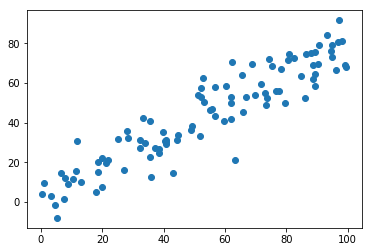

In [3]:
plt.scatter(X[:, 0], X[:, 1])

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

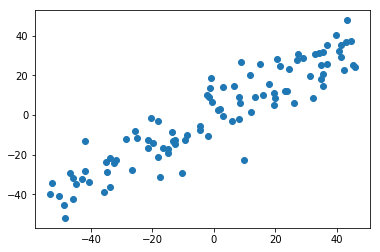

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

In [7]:
np.mean(X_demean[:, 0]), np.mean(X_demean[:, 1])

(-3.1192826099868396e-14, -4.298783551348606e-15)

### 梯度上升法

In [8]:
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)

In [9]:
def df_math(w, X):
    return X.T.dot(X.dot(w))*2. / len(X)

In [10]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_accent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    i_iters = 0
    
    while i_iters < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)

        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        i_iters += 1
        
    return w

In [11]:
# 随即一个初始向量，维度与X特征个数相同
initial_w = np.random.random(X.shape[1])
initial_w

array([0.0637282 , 0.40021345])

In [12]:
eta = 0.001 

In [13]:
w = gradient_accent(df_math, X_demean, initial_w, eta)
w

array([0.77758157, 0.62878208])

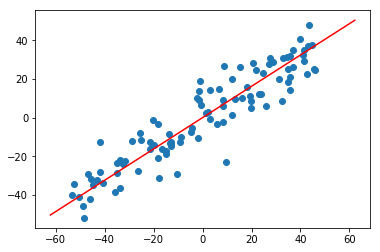

In [14]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([w[0]*-80, w[0]*80], [w[1]*-80, w[1]*80], color='r')

## scikit-learn中的PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
# n_components表示映射到低维的维度
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[-0.77758182, -0.62878177]])

In [18]:
# 将高维数据映射到低维
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [19]:
# 将低维数据还原成高维 —— ( 以特征向量为基 )
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

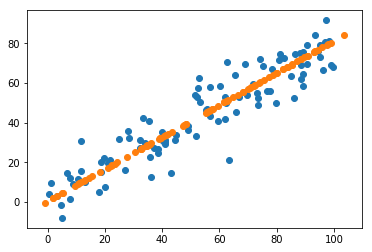

In [20]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_restore[:, 0], X_restore[:, 1])

## 用PCA识别手写数据

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [24]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(8, 8)
some_digit_image, y_train[0]

(array([[ 0.,  0.,  6., 12., 15.,  9.,  1.,  0.],
        [ 0.,  5., 14.,  4.,  5., 16.,  3.,  0.],
        [ 0.,  9.,  8.,  3., 13., 16.,  4.,  0.],
        [ 0.,  3., 15., 15.,  7., 10.,  8.,  0.],
        [ 0.,  0.,  0.,  1.,  0., 12.,  8.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 11.,  2.,  0.],
        [ 0.,  0.,  7.,  4.,  5., 13.,  0.,  0.],
        [ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.]]), 9)

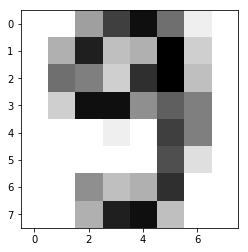

In [25]:
plt.imshow(some_digit_image, cmap=plt.cm.gray_r)

### 利用knn算法识别未经降维的手写字体

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf1 = KNeighborsClassifier()
%time knn_clf1.fit(X_train, y_train)
knn_clf1.score(X_test, y_test)

CPU times: user 2.2 ms, sys: 563 µs, total: 2.76 ms
Wall time: 2.16 ms


0.9888888888888889

### 利用PCA降维之后，使用knn识别的效率

In [78]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [75]:
knn_clf2 = KNeighborsClassifier()
%time knn_clf2.fit(X_train_reduction, y_train)
knn_clf2.score(X_test_redection, y_test)

CPU times: user 1.31 ms, sys: 869 µs, total: 2.18 ms
Wall time: 1.32 ms


0.6055555555555555

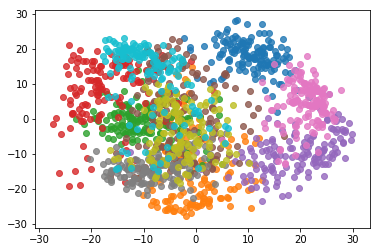

In [80]:
for i in range(10):
    plt.scatter(X_train_reduction[y_train==i, 0], X_train_reduction[y_train==i, 1], alpha=0.8)

### PCA每个维度解释信息(方差)的比例

In [61]:
# 降维过低，导致数据丢失信息过多，那么降到多少维适合的呢

pca.explained_variance_ratio_   #每个维度解释信息的比例

array([0.1450646 , 0.13714246])

In [65]:
pca2 = PCA(n_components = X_train.shape[1])
pca2.fit(X_train)
pca2.explained_variance_ratio_

array([1.45064600e-01, 1.37142456e-01, 1.19680004e-01, 8.43768923e-02,
       5.87005941e-02, 5.01797333e-02, 4.34065700e-02, 3.61375740e-02,
       3.39661991e-02, 3.00599249e-02, 2.38906921e-02, 2.29417581e-02,
       1.81335935e-02, 1.78403959e-02, 1.47411385e-02, 1.41290045e-02,
       1.29333094e-02, 1.25283166e-02, 1.01123057e-02, 9.08986879e-03,
       8.98365069e-03, 7.72299807e-03, 7.62541166e-03, 7.09954951e-03,
       6.96433125e-03, 5.84665284e-03, 5.77225779e-03, 5.07732970e-03,
       4.84364707e-03, 4.34595748e-03, 3.73352381e-03, 3.57655938e-03,
       3.30727680e-03, 3.18129431e-03, 3.06969704e-03, 2.89170006e-03,
       2.51205204e-03, 2.27743660e-03, 2.22760483e-03, 2.00065017e-03,
       1.89529684e-03, 1.56877138e-03, 1.42740894e-03, 1.39115781e-03,
       1.20896097e-03, 1.10149976e-03, 9.81702199e-04, 8.82376601e-04,
       5.69898729e-04, 4.10322729e-04, 2.32125043e-04, 8.49807543e-05,
       5.37426557e-05, 5.27990816e-05, 1.03398093e-05, 6.20749843e-06,
      

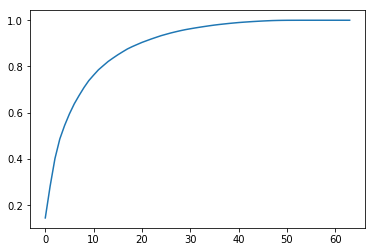

In [67]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca2.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [69]:
# sklearn已经将解释比例封装成了参数

pca3 = PCA(0.95)   #需要解释95%的信息
pca3.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
pca3.n_components_

28

In [71]:
X_train_reduction = pca3.transform(X_train)
X_test_redection = pca3.transform(X_test)

In [72]:
knn_clf3 = KNeighborsClassifier()
%time knn_clf3.fit(X_train_reduction, y_train)
knn_clf3.score(X_test_redection, y_test)

CPU times: user 1.41 ms, sys: 596 µs, total: 2.01 ms
Wall time: 1.38 ms


0.9833333333333333

## mnist数据集

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")

In [3]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [20]:
X, y = mnist['data'], mnist['target']

In [21]:
X.shape

(70000, 784)

In [23]:
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((60000, 784), (60000,), (10000, 784), (10000,))

### 使用knn

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 25 s, sys: 88.6 ms, total: 25 s
Wall time: 25.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
%time knn_clf.score(X_test, y_test)

CPU times: user 8min 27s, sys: 721 ms, total: 8min 28s
Wall time: 8min 28s


0.9688

### 先使用pca降维，再调用knn分类

In [32]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [33]:
X_train_reduction.shape

(60000, 87)

In [34]:
knn_clf2 = KNeighborsClassifier()
%time knn_clf2.fit(X_train_reduction, y_train)

CPU times: user 266 ms, sys: 2.65 ms, total: 268 ms
Wall time: 267 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
X_test_reduction = pca.transform(X_test)
X_test_reduction.shape

(10000, 87)

In [36]:
%time knn_clf2.score(X_test_reduction, y_test)

CPU times: user 55.2 s, sys: 58.9 ms, total: 55.3 s
Wall time: 55 s


0.9728

## 使用PCA降噪

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

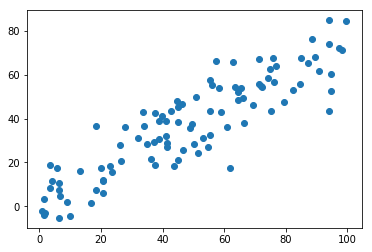

In [39]:
plt.scatter(X[:, 0], X[:, 1])

In [40]:
from sklearn.decomposition import PCA
    
pca = PCA(1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

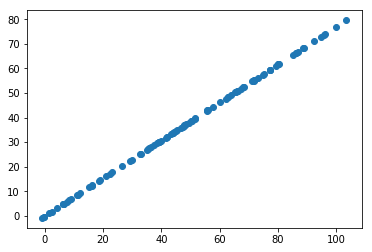

In [41]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])

### 手写识别的例子

In [54]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [61]:
# 给数据集添加噪音
noisy_digits = X + np.random.normal(0, 4, size=X.shape)
noisy_digits

array([[-11.44180146,   3.02242443,   3.69097588, ...,  11.81856238,
          0.48717679,   8.09447739],
       [  1.2743826 ,  -3.34022429,  -1.28004549, ...,   8.2926143 ,
          6.40950578,   2.95764536],
       [ -2.92287019,  -5.04738793,  -3.0903433 , ...,  14.94831371,
          7.52093982,  -0.10073094],
       ...,
       [ -1.10745875,  -2.53932723,   3.99731798, ...,  -3.56963564,
         -2.51866177,  -4.26877766],
       [ -4.86182518,   1.00688168,  -2.33973247, ...,  12.64128262,
          2.3921344 ,   3.96387654],
       [ -2.84749745,  -2.66088781,   9.59096809, ...,  11.73469249,
          4.71059001,   0.50141199]])

In [65]:
# 取前10个lable为0~9的有噪样本进行可视化
example_digits = noisy_digits[y==0, :][:10]

for num in range(1, 10):
    X_num = noisy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])   

In [66]:
example_digits.shape

(100, 64)

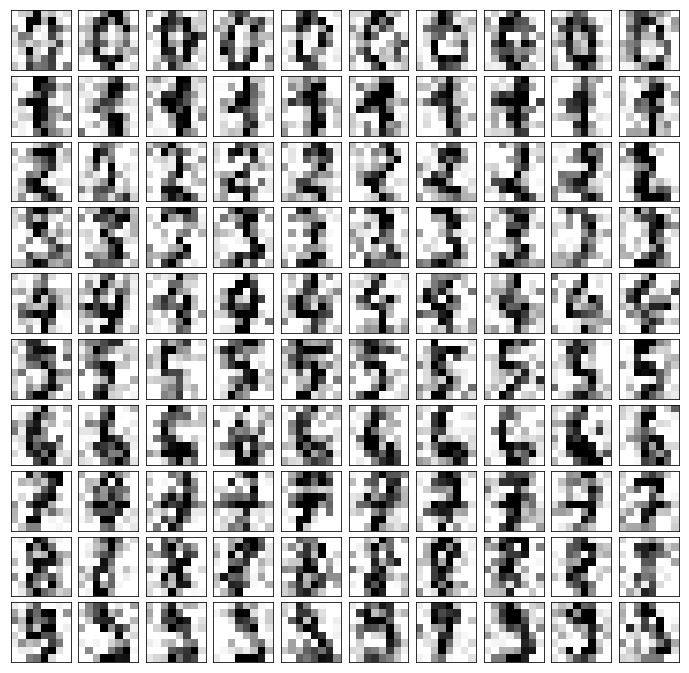

In [76]:
def plot_digits(data):
    fig, axes = plt.subplots(10 ,10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
        
plot_digits(example_digits)

#### PCA降噪

In [77]:
# 因为噪声过多，信息保留比例选择低一些
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
pca.n_components_

12

In [80]:
pca_digits = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(pca_digits)
filtered_digits.shape

(100, 64)

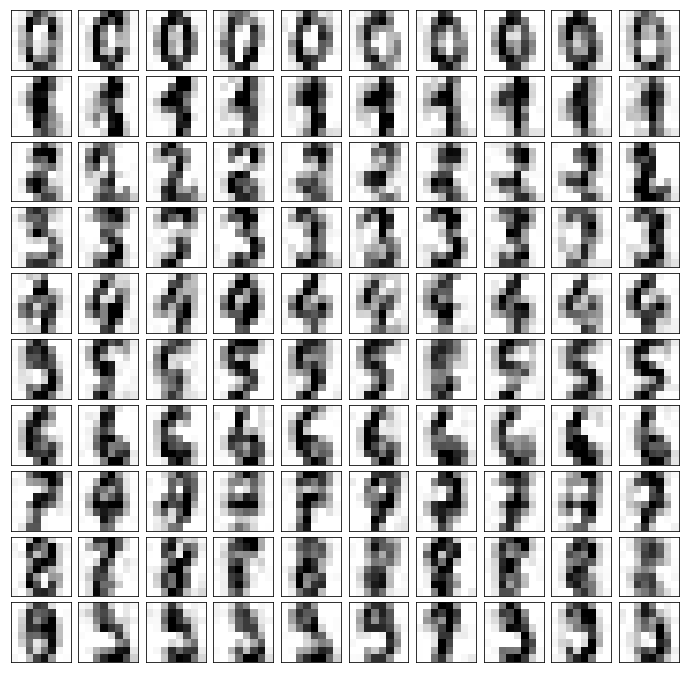

In [81]:
plot_digits(filtered_digits)

## 特征脸（Eigenface）

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
from sklearn.datasets import fetch_lfw_people

In [135]:
faces = fetch_lfw_people("people_faces")

In [88]:
faces.data.shape, faces.images.shape

((13233, 2914), (13233, 62, 47))

In [94]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [95]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

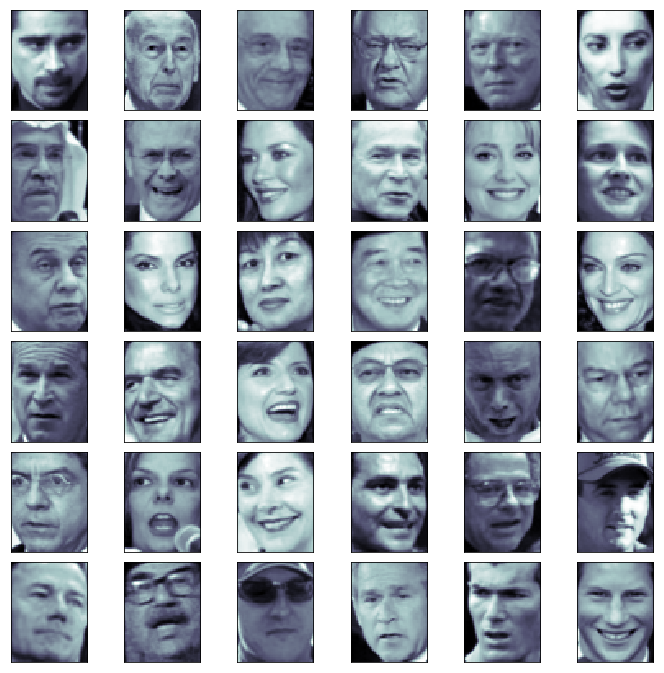

In [97]:
def plot_faces(faces):
    fig, axes = plt.subplots(6 ,6, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
        
plot_faces(example_faces)

In [105]:
faces.target_names, len(faces.target_names)

(array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
        'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35'), 5749)

In [118]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized')
%time pca.fit(X)

CPU times: user 1min 11s, sys: 2.05 s, total: 1min 13s
Wall time: 20.9 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [123]:
# m*n, m表示维度，n表示每维的特征数
# pca将主成分进行了排序，排序越前，解释能力越强
pca.components_.shape

(2914, 2914)

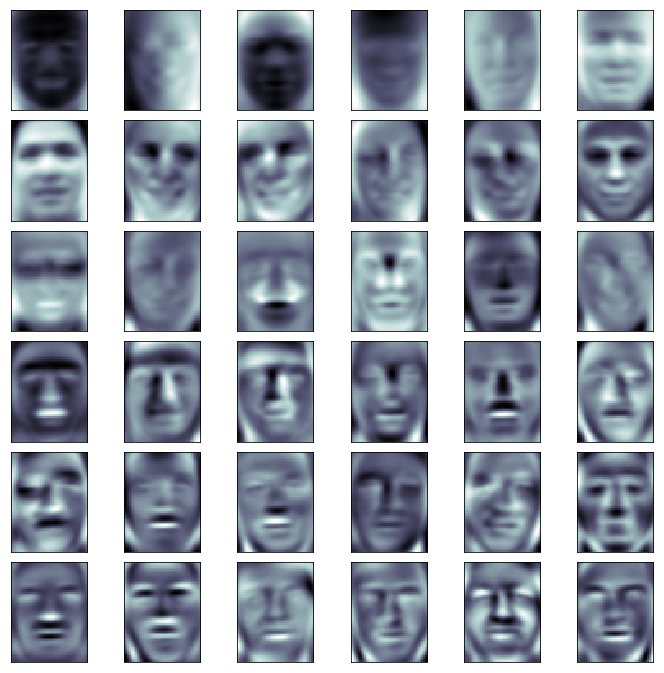

In [124]:
plot_faces(pca.components_[:36, :])

In [138]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [139]:
faces2.data.shape, faces2.target_names, len(faces2.target_names)

((1348, 2914),
 array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
        'Tony Blair'], dtype='<U17'),
 8)